# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
  
from sklearn.metrics import mean_squared_error

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [11]:
# Load data - YMMV regarding the specified path :)
traindf = pd.read_csv("./data/dataset_1_train.txt")
testdf  = pd.read_csv("./data/dataset_1_test.txt")

In [12]:
# Normalize Data - TimeMin
traindf.TimeMin = traindf.TimeMin/1440
testdf.TimeMin  = testdf.TimeMin/1440

In [13]:
# View test data summary statistics
testdf.describe()

,TimeMin,PickupCount
count,1000.000000,1000.000000
mean,0.488008,33.343000
std,0.281077,19.200208
min,0.002778,1.000000
25%,0.245139,17.000000
50%,0.478472,33.000000
75%,0.727431,46.000000
max,0.998611,116.000000


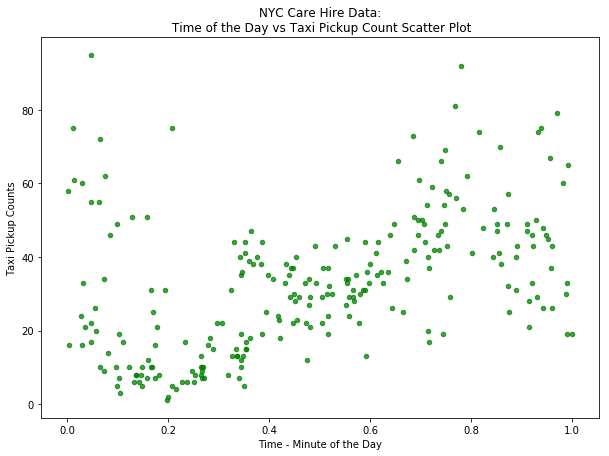

In [14]:
# Visualize training data

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(traindf.TimeMin, traindf.PickupCount, color='green', alpha=0.75, s=20)

ax.set_xlabel('Time - Minute of the Day')
ax.set_ylabel('Taxi Pickup Counts')
ax.set_title('NYC Care Hire Data:\n Time of the Day vs Taxi Pickup Count Scatter Plot')

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

#### Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 

#### Q:  If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$? <br><br>
A:  A k-NN regression model that uses $k = n$ will produce a fitted model that is a straight line with slope 0 and y-intercept occurring at the mean value of the response variable.

In [15]:
X_train = traindf[['TimeMin']].values
X_test  = testdf[['TimeMin']].values

y_train = traindf['PickupCount'].values
y_test  = testdf['PickupCount'].values

# Sort X_train, y_train -- Doing this for plotting purposes
y_train = y_train[np.argsort(X_train, axis=0)]
X_train = np.sort(X_train, axis=0)


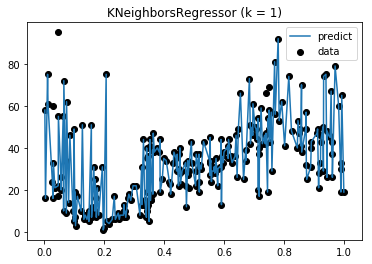

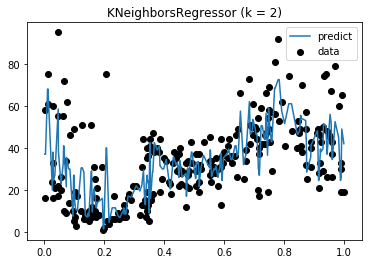

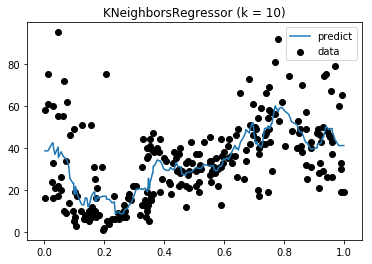

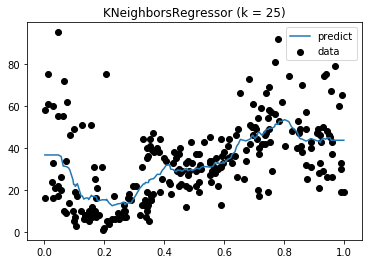

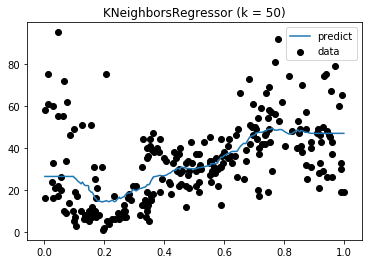

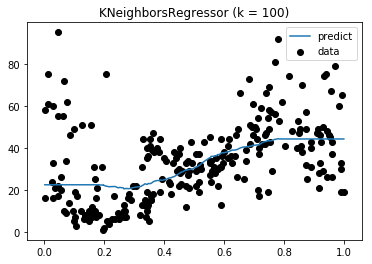

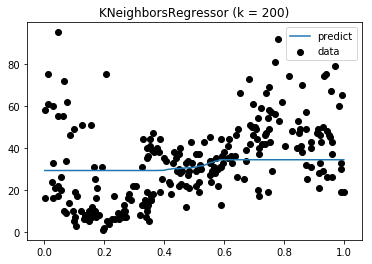

In [16]:
# Fit a k-NN regression model
#

k_vals = [1, 2, 10, 25, 50, 100, 200]
r2_scores = {'test': [], 'train': []}
for k in k_vals:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    y_train_red = knn.predict(X_train)
    r2_scores['test'].append(r2_score(y_test, y_test_pred))
    r2_scores['train'].append(r2_score(y_train, y_train_pred))
    plt.scatter(X_train, y_train, c='k', label='data')
    plt.plot(X_train, y_train_pred, label='predict')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (k))
    plt.show()


#### Q:  How does the value of k affect the fitted model? 

A:  As k gets smaller, more overfitting will occur to the point where each adjacent point is joined by a line segment when k = 1.  <br><br> As k gets larger, more underfitting will occur and the fit will begin to approximate a straight line with slope 0 and y-intercept equalling the mean value for the response variable, PickupNum (~33).  <br><br>  At k = 250 (the number of points in the training sample), the fitted model is a straight line with slope 0 and y-intercept occurring at PickupNum's mean (~33).

### Compute the  R2


In [17]:
from IPython.display import display, HTML
asd = pd.DataFrame({'K Nearest Neighbors' : k_vals,
                    'Train R^2'           : r2_scores['train'],
                    'Test R^2'            : r2_scores['test']})
display(HTML(asd.to_html(index=False)))
                                        



K Nearest Neighbors,Test R^2,Train R^2
1,0.026793,0.878980
2,0.235411,0.646830
10,0.415407,0.450979
25,0.414030,0.419214
50,0.380501,0.354332
100,0.311639,0.286954
200,0.109465,0.108573


#### Q:  Are some of the calculated R2 values negative? <br><br> 
A:  No, all R2 values in the above table are positive. <br><br><br> 
#### Q:  What does a R2 score of 0 mean?  <br><br> 
A:  A  R2 score of 0 means that the predictor variable (TimeMin) accounts for none of the variation in the response variable (PickupCount).

### Make plots of the training and test  R2

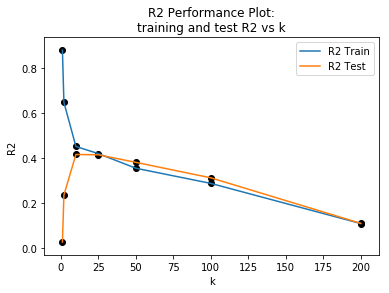

In [18]:

plt.plot(k_vals, r2_scores['train'], label='R2 Train')
plt.plot(k_vals, r2_scores['test'], label='R2 Test')
plt.scatter(k_vals, r2_scores['train'], c='k')
plt.scatter(k_vals, r2_scores['test'], c='k')
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('R2')
plt.legend()
plt.title("R2 Performance Plot:\ntraining and test R2 vs k")
plt.show()

#### Q:  Do the training and test  R2 plots exhibit different trends? Explain how the value of k influences the training and test R2 values. <br><br> 
A:  Yes, the training R2 score starts out very high, but quickly decreases as k increases. The test R2 score starts very low, but quickly increases to approximately match the score of the training data set at k=10
This indicates that overfitting may be occurring when k < 10, but as the value of k increases the model becomes equally bad at predicting both the train and test data

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [19]:
ols = sm.OLS(y_train, X_train).fit()
X_train_lin = sm.add_constant(X_train)
X_test_lin = sm.add_constant(X_test)

ols = sm.OLS(y_train, X_train_lin).fit()

lin_train_pred = ols.predict(X_train_lin)
lin_test_pred = ols.predict(X_test_lin)

print("Slope for the fitted linear model: %f" %(ols.params[1]))
print("Intercept for the fitted linear model: %f" %(ols.params[0]))

Slope for the fitted linear model: 30.289023
Intercept for the fitted linear model: 18.026385


#### Evaluate R2 value on both the training and test sets (you may notice something peculiar about how they compare).

In [20]:
print ("Linear Regression R^2 for train set:   " + str(r2_score(y_train, lin_train_pred)))
print ("Linear Regression R^2 for test set:    " + str(r2_score(y_test, y_test_pred)))


Linear Regression R^2 for train set:   0.207213752099
Linear Regression R^2 for test set:    0.109465043358


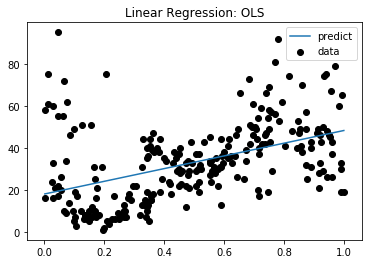

In [21]:
plt.scatter(X_train, y_train, c='k', label='data')
plt.plot(X_train, lin_train_pred, label='predict')
plt.axis('tight')
plt.legend()
plt.title("Linear Regression: OLS")
plt.show()

#### Q: How does the test R2 score compare with the best test R2 value obtained with k-NN regression in Part (a)? <br><br> 
A:  The test R2 for the linear model is worse (0.109) than the best k-NN regression test R2 value (0.414).  <br><br> 

### Compute confidence intervals

#### Q: Print the slope and intercept values for the fitted linear model.  What does the sign of the slope convey about the data?

A: The slope is positive and relatively large (30.28), indicating there is positive correlation between PickupCount and TimeMin.


In [22]:
# Print slope and intercept values for the fitted linear model.
beta0_sm = ols.params[0]
beta1_sm = ols.params[1]

print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))


(beta0, beta1) = (18.026385, 30.289023)


#### Compute the 95% confidence interval for the slope and intercept. 
A:  From results_regr_sm.summary() below, the 95% confidence interval is [22.879, 37.699], and [13.850, 22.203] for the slope and intercept, respectively.  Both are considered statistically significant because their corresponding P-values ( P > |t| ) are less than 0.05.

In [23]:
print (ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           3.43e-14
Time:                        09:05:39   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.0

#### Q:  Based on this information, do you consider the estimates of the model parameters to be reliable? 
A:  No, they do not seem to be particularly reliable. If a model tells me that there are 34 pickups per minute at that time of day, but then I find out that there could very likely also be 30 pickups or 38 pickups, it doesn't seem particularly useful or reliable. 

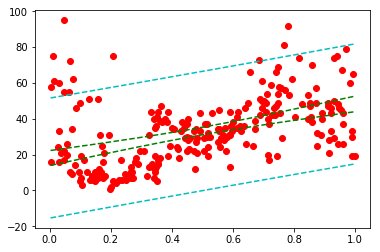

In [24]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(ols, alpha=0.05)
ci_low = data[:,4]
ci_hi = data[:,5]
pi_low = data[:,6]
pi_hi = data[:,7]
plt.plot(X_train, y_train, 'ro')
plt.plot(X_train, ci_low, 'g--', label='c')
plt.plot(X_train, ci_hi, 'g--')
plt.plot(X_train, pi_low, 'c--')
plt.plot(X_train, pi_hi, 'c--')


#### Q: Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals?  <br><br> 
A: We expect the 99% confidence interval for the slope and intercept to be looser (wider) than the 95% confidence interval since we should be more confident the response variable falls within an expanded range (vs a more narrow range) of values than the 95% confidence interval

### Analyze residual plots:

#### Make a plot of the residuals e=y−ŷ of the model on the training set as a function of the predictor variable x (i.e. time of day). <br>Draw a horizontal line denoting the zero residual value on the Y-axis.  <br>Using this residual plot, comment on whether the assumption of linearity is valid for this data.

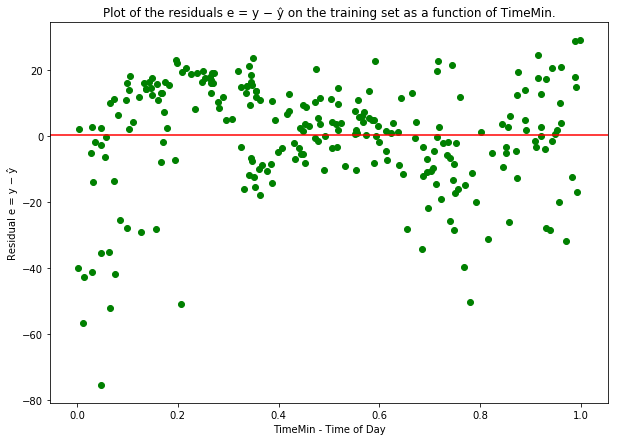

In [25]:
# Calculate Residuals
residuals = (lin_train_pred - y_train.flatten()).flatten()
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(X_train, residuals, color='green')
ax.axhline(y=0.5, color='r', linestyle='-')
ax.set_xlabel('TimeMin - Time of Day')
ax.set_ylabel('Residual e = y − ŷ')
ax.set_title('Plot of the residuals e = y − ŷ on the training set as a function of TimeMin.')


Observation:  While some portions, such as the middle section, of the residual plot look normally distributed, the left and right ends, in particular have curavature, suggesting there is some non-linearity in the relationship between the response and predictor variable. This may suggest unusual cab rides at night that a linear model was not able to capture

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:



#### Q: At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

A: Polynomials get very large very fast. If the data had not been normalized, the coefficients and exponents might have been too large and small to deal with reasonably. Floating point errors and the limits of integer values may have been a problem.


- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

#### Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time).

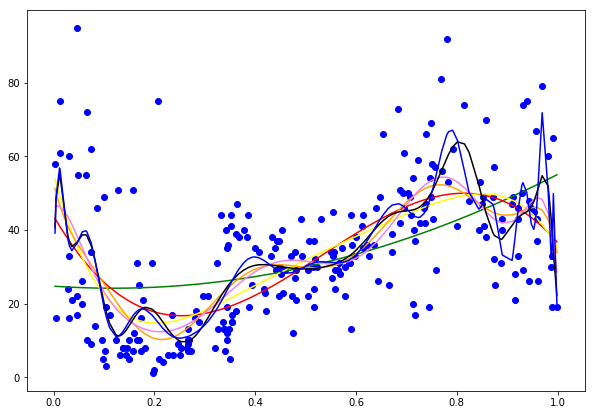

In [29]:
degrees = [2, 3, 5, 9, 10, 25, 50]
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(traindf.TimeMin, traindf.PickupCount, color='blue')
color = ['green', 'red', 'yellow', 'orange', 'violet', 'black', 'blue']
r2_poly = {'test':[], 'train': []}
residuals_poly = {'test': [], 'train': []}
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    poly_train_model = sm.OLS(y_train, X_train_poly).fit()
    
    poly_train_pred = poly_train_model.predict(X_train_poly)
    poly_test_pred = poly_train_model.predict(X_test_poly)
    residuals_poly['train'].append(np.subtract(poly_train_pred, y_train.flatten()))
    residuals_poly['test'].append(np.subtract(poly_test_pred, y_test.flatten()))

    r2_poly['test'].append(r2_score(y_test, poly_test_pred))
    r2_poly['train'].append(r2_score(y_train, poly_train_pred))
    
    ax.plot(X_train.flatten(), poly_train_pred.flatten(), color=color[i])
    
    

#### Q: By visual inspection, what polynomial degree do you think would provide the best fit for the data?

A: It is difficult to tell by visual inspection, but it appears that the orange line does a good job of capturing broad patterns in the data, such as late night/bar rushes, before/after work trips and lunch trips, without overfitting to smaller outliers in the data.

### Evaluate the  R2 value of the fitted models on both the training and test sets.  <br>
#### Q:  Does a high training R2 value necessarily indicate a high test  R2 value? 
A: No, because overfitting to the training data may be occurring. 

#### Q:  How do the test R2 values from the different polynomial models compare with the test R2 from simple linear regression in Part (b), and the best test R2 from k-NN regression in Part (a)?  

A:  The R2 values for both k-NN and polynomial regression were better than the R2 values for linear regression. Increasing the k value for k-NN caused the R2 score to peak and then fall as increasing k too much actually made the predictions worse. Increasing the number of degrees in the polynomial regression continues to cause the R2 score for the training data to rise as the algorithm overfits the data. Of course, the R2 score for the polynomial regression on the training data falls as the number of degrees go beyond 10, also indicating that there is an overfitting problem.

Polynomial (n):,Test R^2,Train R^2
2,0.255724,0.232433
3,0.378584,0.374836
5,0.387226,0.391058
9,0.415519,0.422197
10,0.402008,0.428277
25,0.383695,0.463303
50,0.333555,0.489089


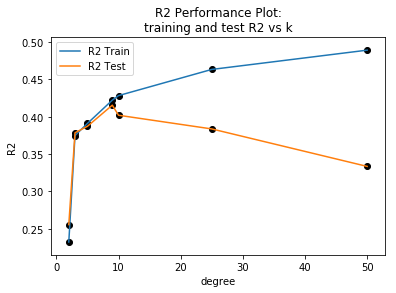

In [18]:
from IPython.display import display, HTML
asd = pd.DataFrame({'Polynomial (n):' : degrees,
                    'Train R^2'           : r2_poly['train'],
                    'Test R^2'            : r2_poly['test']})
display(HTML(asd.to_html(index=False)))

plt.plot(degrees, r2_poly['train'], label='R2 Train')
plt.plot(degrees, r2_poly['test'], label='R2 Test')
plt.scatter(degrees, r2_poly['train'], c='k')
plt.scatter(degrees, r2_poly['test'], c='k')
plt.axis('tight')
plt.xlabel('degree')
plt.ylabel('R2')
plt.legend()
plt.title("R2 Performance Plot:\ntraining and test R2 vs k")
plt.show()


### Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). 
#### Q: How does the increase in polynomial degree effect the residual plots?

A: The broad patterns in the residuals remain the same. There is a large peak in the residuals around the very early/late parts of the day (presumably when people get out of bars) and also a peak around lunch time. As the degrees of the polynomial regression increase the residuals get much "spikier" and more clearly defined. At lower degrees the plot of residuals is less clearly defined, and smoother.

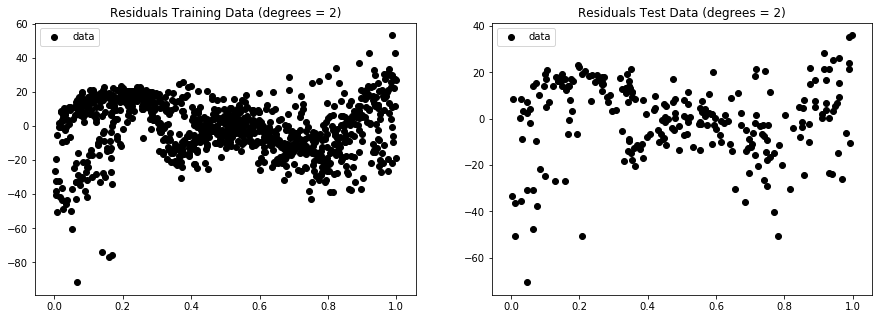

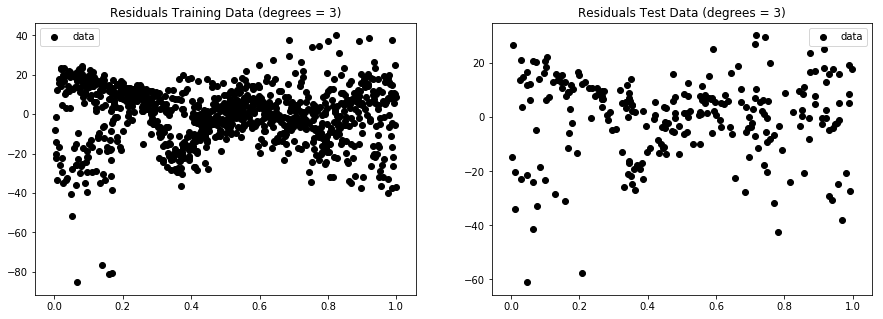

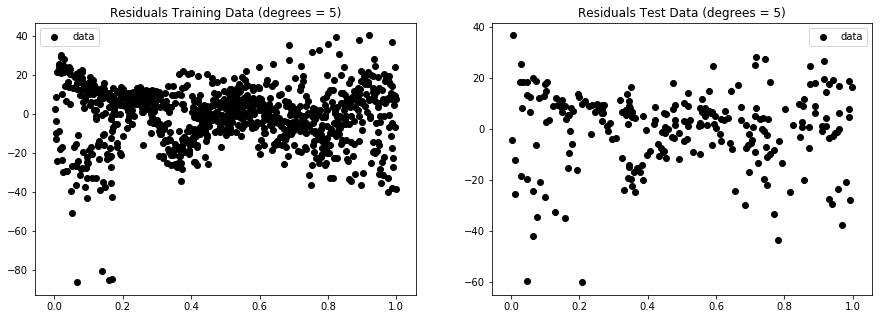

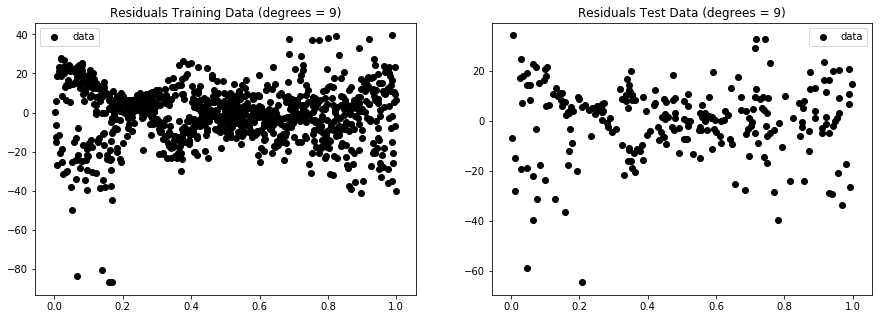

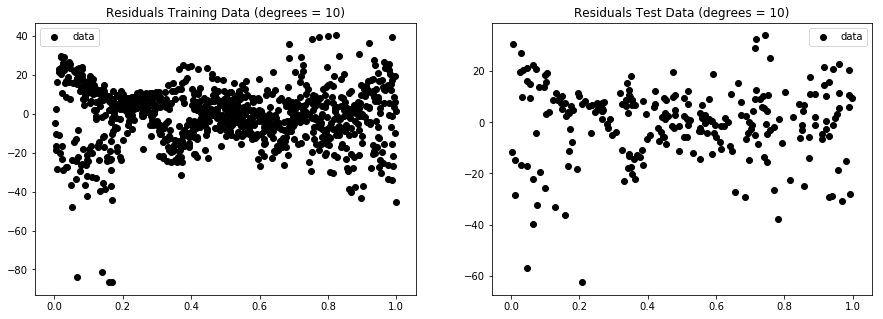

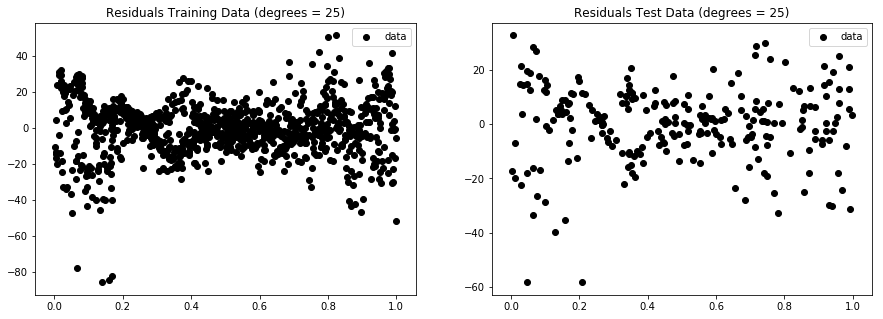

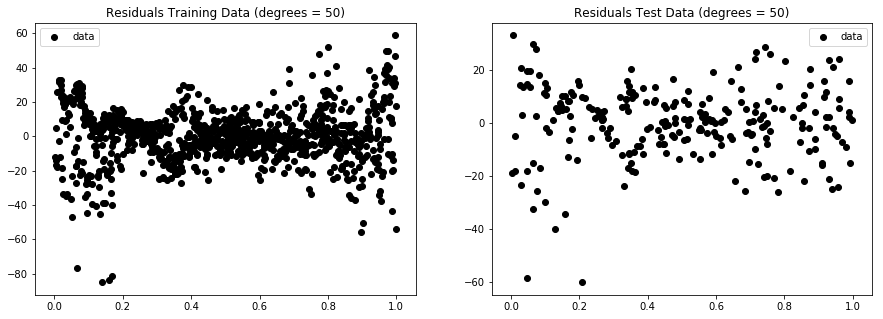

In [19]:
# Calculate Residuals

for i, degree in enumerate(degrees):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_test, residuals_poly['test'][i], c='k', label='data')
    plt.axis('tight')
    plt.legend()
    plt.title("Residuals Training Data (degrees = %i)" % (degree))
    plt.subplot(1, 2, 2)
    plt.scatter(X_train, residuals_poly['train'][i], c='k', label='data')
    plt.axis('tight')
    plt.legend()
    plt.title("Residuals Test Data (degrees = %i)" % (degree))
    plt.show()
    

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



A: The simple linear regression, with an R2 score on the test data of 0.11, did not perform well at all compared to k-NN and polynomial regression algorithms, and we can immediately discard that as a choice of algorithm. 

The k-NN's highest R2 score on the test data was 0.415 at k=10, whereas the highest R2 score for the polynomial regression was 0.402 around degrees=10.
We may be able to improve our approach by inspecting the values around k=10 and degrees=10 to find a more accurate maximum R2 score. This appears to be at k=14 (0.419) and degrees=12 (0.405) although this does not significantly increase the scores. 
We can also combine the algorithms by taking both models at k=14 and degrees=12 and returning their average, or a weighted average, perhaps based on how the models performed. 

In [20]:
knn = KNeighborsRegressor(14)
knn.fit(X_train, y_train)
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

poly = PolynomialFeatures(12)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_train_model = sm.OLS(y_train, X_train_poly).fit()

poly_train_pred = poly_train_model.predict(X_train_poly)
poly_test_pred = poly_train_model.predict(X_test_poly)

combined_train_pred = [np.average(pred_set, weights=[2,1.0]) for pred_set in list(zip(knn_train_pred.flatten(), poly_train_pred.flatten()))]
combined_test_pred = [np.average(pred_set, weights=[2,1.0]) for pred_set in list(zip(knn_test_pred.flatten(), poly_test_pred.flatten()))]
print("Train R2 score: ", r2_score(y_train, combined_train_pred))
print("Test R2 score: ", r2_score(y_test, combined_test_pred))



Train R2 score:  0.446743916249
Test R2 score:  0.421069709914


Of course, these types of approaches can have their own dangers. As we go through many slight variations on the same algorithm, we may inadvertantly be fitting the algorithm on the test data as we choose algorithms that only perform well on the test data.
Ways to avoid this might be switching which set of data we use for training, bagging the given data, or collecting more data from the real world. 